# Predicting shots made per game by Kobe Bryant

In this lab you'll be using regularization techniques Ridge, Lasso, and Elastic Net to try and predict well how many shots Kobe Bryant made per game in his career.

---

### 1. Load packages and data

In [1]:
import numpy as np
import pandas as pd
import patsy
import sklearn

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
kobe = pd.read_csv('/Users/tyronewilliams/Desktop/DSI-SF-4/datasets/kobe_bryant/kobe_superwide_games.csv')

In [3]:
kobe.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


---

### 2. Examine the data

- How many columns are there?
- Infer what the observations (rows) and columns represent.
- Why is this data that regularization might be particularly useful for?

In [4]:
kobe.shape

(1558, 645)

---

### Make predictor and target variables. Normalize the predictors.

Why is normalization necessary for regularized regressions?

There is a class in sklearn.preprocessing called `StandardScaler`. Look it up and figure out how to use it to normalize your predictor matrix. 

In [5]:

from sklearn import preprocessing
import numpy as np

In [6]:
ss = preprocessing.StandardScaler()



In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

y = kobe["SHOTS_MADE"]
x = kobe.ix[:,1:-1]
cols = x.columns
x_scaled = preprocessing.StandardScaler().fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=cols)
x_scaled.head()

,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,SEASON_OPPONENT:atl:2005-06,...,ACTION_TYPE:step_back_jump_shot,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER
0,-1.001285,-0.035852,-0.035852,-0.025343,-0.025343,-0.035852,-0.035852,-0.025343,-0.025343,-0.035852,...,-0.23895,-0.035852,-0.281806,-0.183922,-0.025343,-0.342591,-0.035746,-0.088428,-0.643218,-1.610867
1,0.998717,-0.035852,-0.035852,-0.025343,-0.025343,-0.035852,-0.035852,-0.025343,-0.025343,-0.035852,...,-0.23895,-0.035852,-0.281806,-0.183922,-0.025343,-0.342591,-0.035746,-0.088428,-0.643218,-1.572464
2,0.998717,-0.035852,-0.035852,-0.025343,-0.025343,-0.035852,-0.035852,-0.025343,-0.025343,-0.035852,...,-0.23895,-0.035852,-0.281806,-0.183922,-0.025343,-0.342591,-0.035746,-0.088428,-0.643218,-1.534062
3,0.998717,-0.035852,-0.035852,-0.025343,-0.025343,-0.035852,-0.035852,-0.025343,-0.025343,-0.035852,...,-0.23895,-0.035852,-0.281806,-0.183922,-0.025343,-0.342591,-0.035746,-0.088428,-0.643218,-1.495659
4,-1.001285,27.892651,-0.035852,-0.025343,-0.025343,-0.035852,-0.035852,-0.025343,-0.025343,-0.035852,...,-0.23895,-0.035852,-0.281806,-0.183922,-0.025343,-0.342591,-0.035746,-0.088428,-0.643218,-1.457256


---

### Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

Cross-validate the $R^2$ of a linear regression model with 10 cross-validation folds.

How does it perform?

In [8]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()


In [9]:
model = lm.fit(x_scaled, y)

In [10]:
# Perform 10-fold cross validation
scores = cross_val_score(model, x_scaled, y, cv=10)
print "Cross-validated scores:", scores

Cross-validated scores: [ -2.28821279e+29  -1.36186370e+28  -6.83295783e+27  -7.79693321e+27
  -1.50821095e+28  -5.61194667e+27  -1.83964580e+27  -2.05737746e+27
  -1.17133609e+28  -4.11514927e+28]


Cross-Predicted Accuracy: -1.90276971147e+28


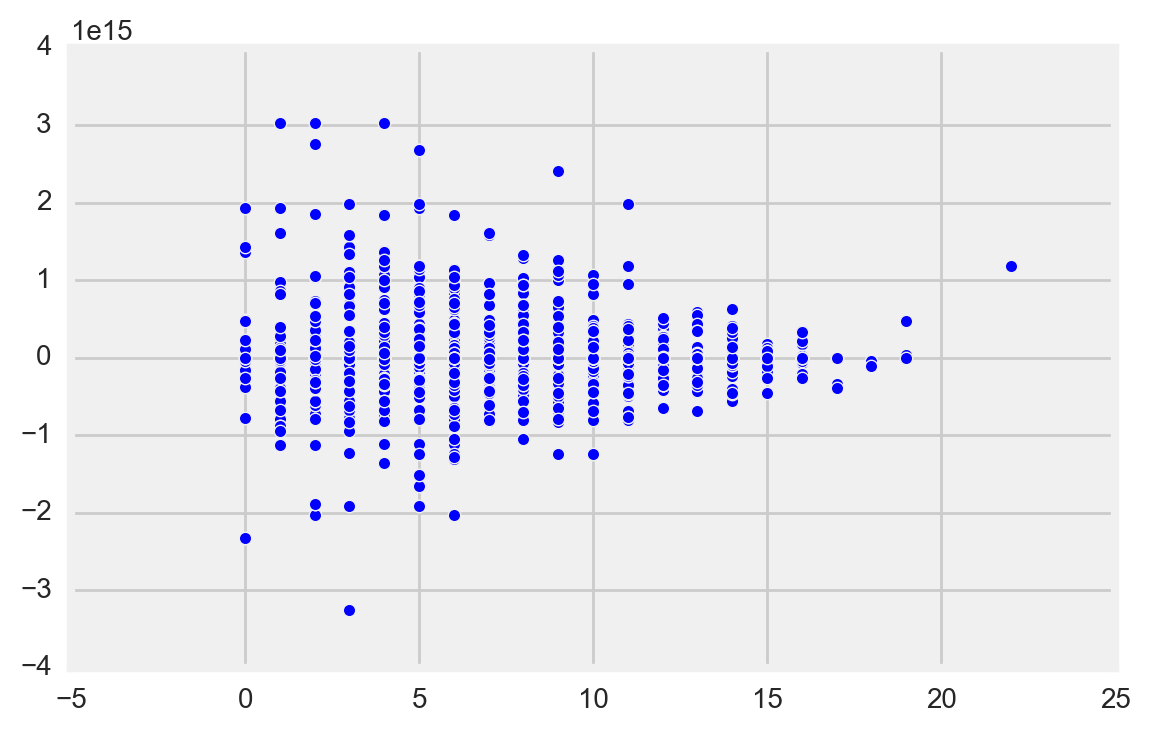

In [11]:
# Make cross validated predictions
predictions = cross_val_predict(model, x_scaled, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy

---

### Find an optimal value for Ridge regression alpha using RidgeCV

[Go to the documentation and read how RidgeCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

Hint: once the RidgeCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.

Recall that Ridge performs best searching alphas through logarithmic space (`np.logspace`).


In [12]:
import patsy
import sys


In [13]:
target = "SHOTS_MADE"

In [14]:
formula_simple = target + ' ~ ' + ' + '.join(cols) + ' -1'
formula_complex = target + '~(' +  "+".join(cols) + ")**2 -1"


In [ ]:
# Create the X and Y pairs for both!
sys.setrecursionlimit(10000)
#Y, X = patsy.dmatrices(formula_simple, data=kobe)
Yoverfit, Xoverfit = patsy.dmatrices(formula_complex, data=kobe)



---

### Cross-validate the Ridge $R^2$ with the optimal alpha.

Is it better than the Linear regression? If so, why would this be?

In [ ]:
Yoverfit

---

### Find an optimal value for Lasso regression alpha using LassoCV

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) It is very similar to RidgeCV.

Hint: again, once the LassoCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.

Recall that Lasso, unlike Ridge, performs best searching alphas through linear space (`np.linspace`). However, you can actually let the LassoCV decide itself what alphas to use by instead setting the keyword argument `n_alphas=` to however many alphas you want it to search over.

---

### Cross-validate the Lasso $R^2$ with the optimal alpha.

Is it better than the Linear regression? Is it better than Ridge? For each, why would this be?

Depending on which $R^2$ is better between the Ridge and Lasso, what can you infer about the primary issue in the data?

---

### Look at the coefficients for variables in the Lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original dataset are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots kobe made in a game?

Note: if you only fit the Lasso within cross_val_score, you will have to refit it outside of that
function to pull out the coefficients.

---

### Find an optimal value for Elastic Net regression alpha using ElasticNetCV

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:

    alpha: strength of regularization
    l1_ratio: amount of ridge vs. lasso (0 = all ridge, 1 = all lasso)
    
Do not include 0 in the search for l1_ratio: it will not allow it and break!

You can use n_alphas for the alpha parameters instead of setting your own values: highly recommended!

Also - be careful setting too many l1_ratios over cross-validation folds in your search. It can take a very long time if you choose too many combinations and for the most part there are diminishing returns in this data.

---

### Cross-validate the ElasticNet $R^2$ with the optimal alpha and l1_ratio.

How does it compare to the other regularized regressions?

---

### Plot the residuals for the ridge, lasso, and elastic net on histograms

This is another way to look at the performance of your model.

The tighter the distribution of residuals around zero, the better your model has performed!